In [2]:
import scanpy as sc
adata=sc.read('/data/work/final/03_anno/allcelltype_delete.h5ad')
#adata.X=adata.layers['counts']
#sc.pp.normalize_total(adata, target_sum=10000)
#sc.pp.log1p(adata)
import celltypist
from celltypist import models
import os
# 设置新的工作目录
os.chdir("/data/work/final/03_anno/celltypist/")
#models.download_models(force_update = True)

/usr/local/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
model = models.Model.load(model = '/data/work/final/03_anno/celltypist/models/Immune_All_Low.pkl')

In [ ]:
adata.obs_names_make_unique()

In [ ]:
predictions = celltypist.annotate(adata, model = '/data/work/final/03_anno/celltypist/models/Immune_All_Low.pkl', majority_voting = True,use_GPU=True)

🔬 Input data has 539297 cells and 47402 genes
🔗 Matching reference genes in the model
🧬 6401 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
⚠️ Warning: rapids_singlecell is not installed but required for GPU running, will switch back to CPU
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 30
🗳️ Majority voting the predictions
✅ Majority voting done!


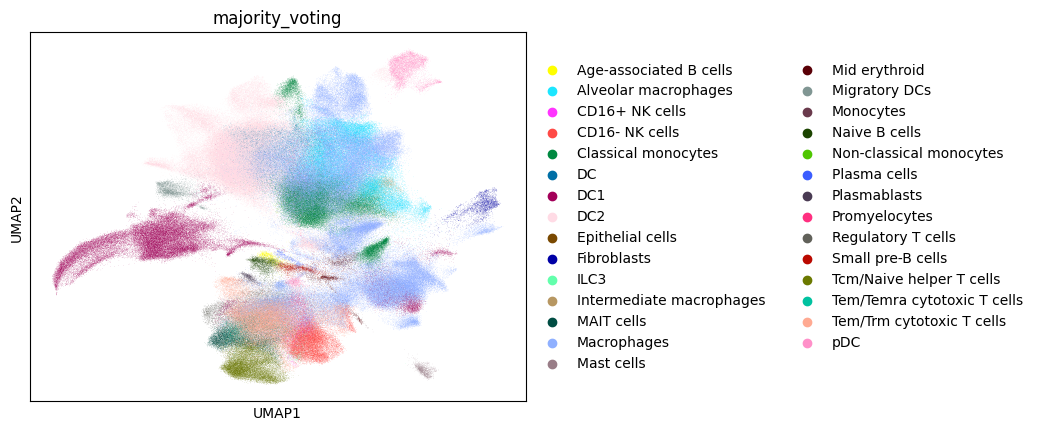

In [ ]:
adata = predictions.to_adata()
sc.pl.umap(adata, color = 'majority_voting')

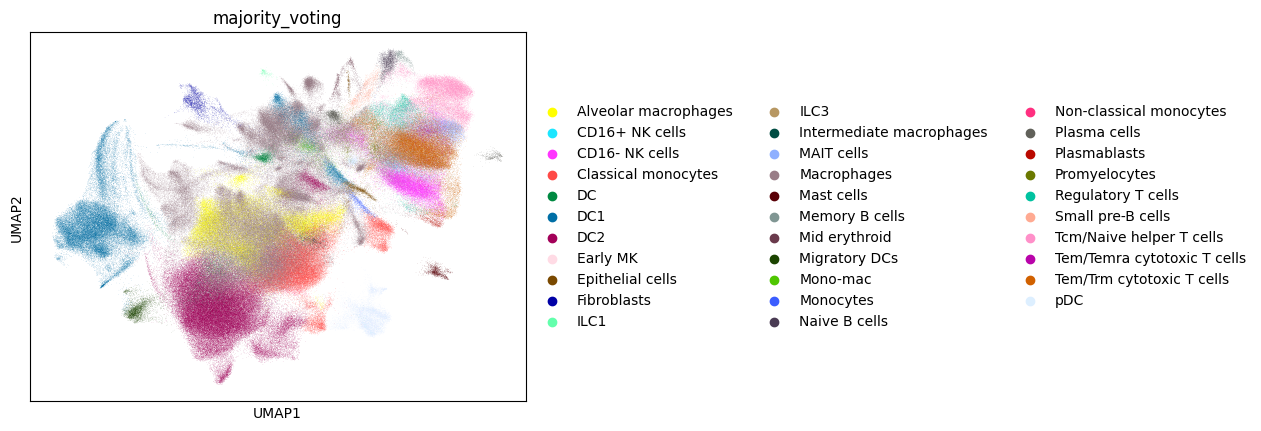

In [8]:
sc.pl.umap(adata, color = 'majority_voting')

In [ ]:
adata.obs['annotation2']=adata.obs['majority_voting']

In [ ]:
del adata.X

In [ ]:
adata.write('/data/work/final/03_anno/anno1_anno2.h5ad')

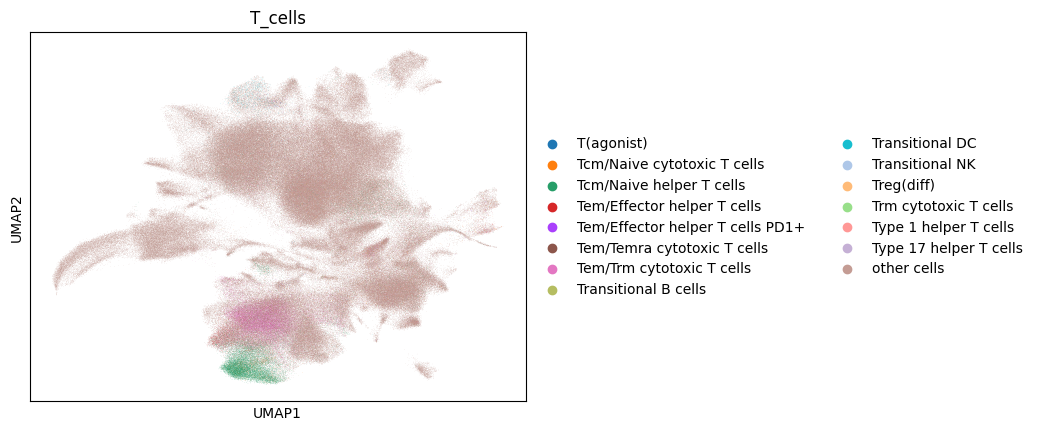

In [1]:
import scanpy as sc
adata=sc.read('/data/work/final/03_anno/celltypist/celltypist_anno.h5ad')
# 提取以 "T" 开头的值，其他设为 NaN
import numpy as np

# 1. 提取 "T" 开头的标签，其余设为 "other cells"
adata.obs['T_cells'] = np.where(
    adata.obs['predicted_labels'].str.startswith('T', na=False),
    adata.obs['predicted_labels'],
    "other cells"  # 非 T 细胞统一标记为 "other cells"
)

# 2. 确保新列是分类变量（便于可视化）
adata.obs['T_cells'] = adata.obs['T_cells'].astype('category')

# 3. 可视化
sc.pl.umap(adata, color='T_cells')

In [ ]:
adata = predictions.to_adata()
sc.pl.umap(adata, color = 'majority_voting')

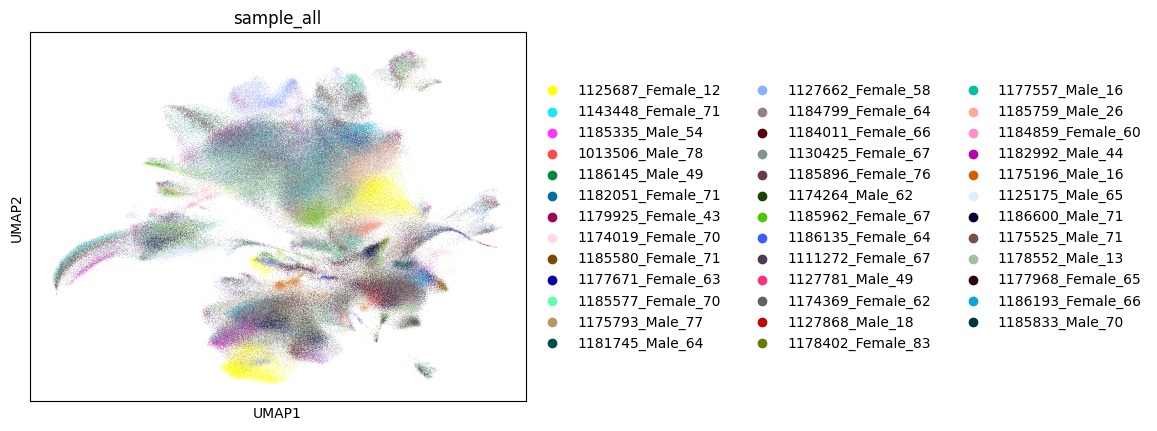

In [ ]:
sc.pl.umap(adata, color = 'sample_all')

In [ ]:
adata.write('/data/work/final/03_anno/celltypist/celltypist_anno.h5ad')

In [1]:
import scanpy as sc
adata=sc.read('/data/work/final/03_anno/celltypist/celltypist_anno.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 563738 × 47402
    obs: 'batch', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'sample', '_scvi_batch', '_scvi_labels', 'leiden', 'sample_all', 'predicted_labels', 'conf_score'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'over_clustering', 'predicted_labels_colors', 'sample_all_colors', 'sample_colors', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

KeyError: 'Could not find key majority_voting in .var_names or .obs.columns.'

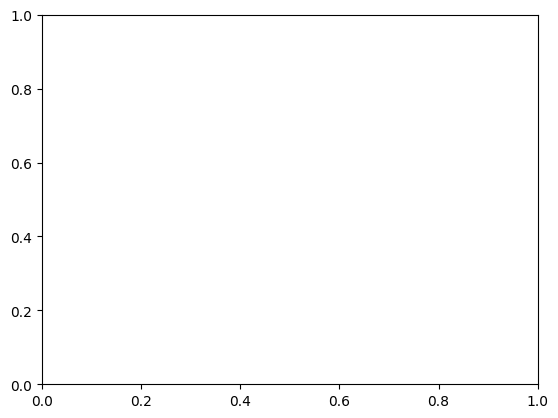

In [ ]:
sc.pl.umap(adata,color='majority_voting')

KeyError: 'Could not find key HBA1 in .var_names or .obs.columns.'

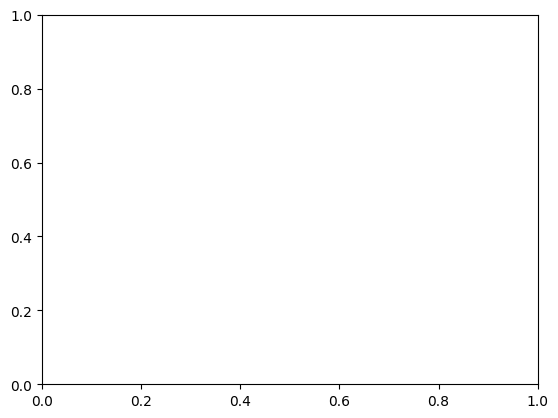

In [5]:
sc.pl.umap(adata,color='HBA1')